# Data preprocessing

This data was digitized from an online article. Hence the datapoints are not evenly distributed in space. We will try and obtain a more reliable dataset by learning from the distribution and generate a new set of datapoints based on the learnt distribution. The Gaussian mixture model would be used for that.

In [17]:

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.mixture import GaussianMixture 


In [18]:
%matplotlib inline

plt.style.use('fivethirtyeight')
#loading our file
fname ='../data/raw/Dataset.csv'
digitized_data = pd.read_csv(fname)
digitized_data.head()

,chain_length,fraction
0,3.492085,0.016109
1,3.587301,0.025129
2,3.685132,0.037238
3,3.785673,0.056916
4,3.889001,0.083930


Text(0.5, 1.0, 'Figure 1')

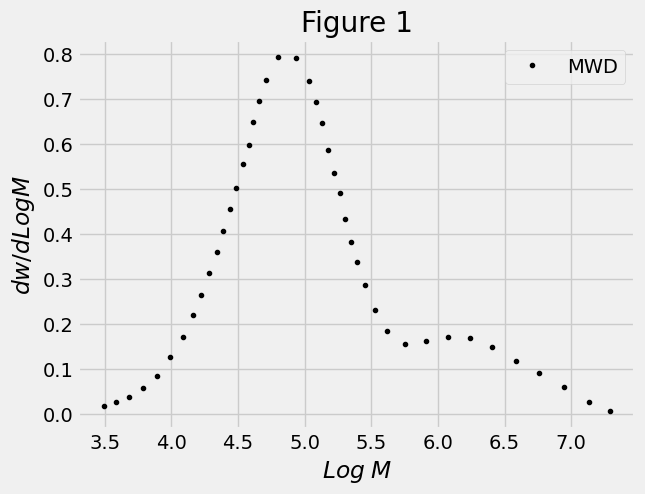

In [19]:
# observing the distribution
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(digitized_data.iloc[:,0],digitized_data.iloc[:,1],'k.',label='MWD')

ax.legend()
ax.set_xlabel('$Log \; M$')
ax.set_ylabel('$dw/dLogM$')
ax.set_title('Figure 1')
# plt.savefig('original_distro.png',dpi=300, bbox_inches='tight')

Learning from the distribution

We will use the Gaussian mixture model from the sklearn and specify the covariance type as full, which allows us the flexibility to fit elliptical shapes if necessary instead of constraining it to circular shapes. We subsequently fit it to the data.

In [20]:
# instantiating a the model and fitting it to the data
gmm_learning =GaussianMixture(n_components=len(digitized_data), covariance_type='full').fit(digitized_data.dropna().values)

After learning from the distribution, we then generate 1000 data points which would be used for clustering.

In [21]:
# generating 1000 data points based on the learning
generated_distribution = gmm_learning.sample(1000)[0]

The first component of the output contains the generated samples and the second the labels. Visualizing the output of the randomly generated samples shows a perfect agreement with the original data.

Text(0.5, 1.0, 'Figure 2')

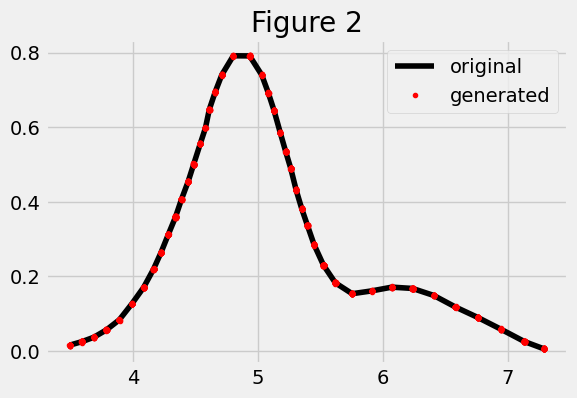

In [22]:
plt.figure(figsize=(6,4))
plt.plot(digitized_data.iloc[:,0],digitized_data.iloc[:,1],'k',label='original')
plt.plot(generated_distribution[:,0],generated_distribution[:,1],'r.',label='generated')
plt.legend()
plt.title('Figure 2')
# plt.savefig('generated_points.png',dpi=300, bbox_inches='tight')